In [1]:
import sympy
import numpy as np
import networkx as nx
import string
import pydotplus
import graphviz
import math
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from python_tsp.heuristics import solve_tsp_local_search
from python_tsp.heuristics import solve_tsp_simulated_annealing
from python_tsp.exact import solve_tsp_dynamic_programming
import time
%matplotlib inline

In [2]:
dist = sympy.randMatrix(r= 20 ,c = 20, min = 1, max =99, symmetric= True, seed = 6)
# sympy 의 인덱스 접근은 [r][c] 형식이 아닌 [r,c]형식로 해야함

for i in range(20):
    dist[i,i] = 0


dist = np.array(dist,dtype = "int")
dist

array([[ 0, 11, 63, 98, 34,  5,  1, 19, 85, 76, 61, 98, 95, 48, 41, 99,
         3, 35, 63, 26],
       [11,  0, 53, 69, 70, 88, 13, 25, 73, 71, 90, 94, 34, 85, 79, 88,
        12, 55, 43, 12],
       [63, 53,  0, 53, 33, 57, 90, 13, 97, 26, 90, 82, 38, 13,  6, 76,
        26, 84, 47, 63],
       [98, 69, 53,  0, 66, 74, 83, 90, 65,  4, 82, 47, 32, 78, 56, 39,
        46, 76, 16, 12],
       [34, 70, 33, 66,  0, 87, 68, 26, 15, 78, 85, 35, 40, 93, 26, 49,
        62, 29, 18, 77],
       [ 5, 88, 57, 74, 87,  0, 90, 67,  2, 25, 22,  3, 83, 43, 72, 86,
        80, 80, 40, 48],
       [ 1, 13, 90, 83, 68, 90,  0, 68, 50, 38, 17, 87, 63,  7, 24, 55,
        77, 96, 51, 13],
       [19, 25, 13, 90, 26, 67, 68,  0, 32, 12, 78, 86, 58, 58, 49, 10,
        67, 55, 61, 39],
       [85, 73, 97, 65, 15,  2, 50, 32,  0, 53, 11, 25, 96, 88, 35, 58,
        63, 93, 23,  3],
       [76, 71, 26,  4, 78, 25, 38, 12, 53,  0, 69, 16, 33, 76, 47, 25,
        33, 65, 58, 43],
       [61, 90, 90, 82, 85, 22

## 각점 좌표

In [3]:
Graph = nx.from_numpy_matrix(dist)
Graph = nx.relabel_nodes(Graph, dict(zip(range(len(Graph.nodes())),string.ascii_uppercase)))    

Graph = nx.drawing.nx_agraph.to_agraph(Graph)

Graph.node_attr.update(color="red", style="filled")
Graph.edge_attr.update(color="blue", width="2.0")

Graph.draw('outdot.dot', format='dot', prog='neato')

Dot = graphviz.Source.from_file('outdot.dot')

parsed_dot = pydotplus.parse_dot_data(Dot.source)

nodes = parsed_dot.get_node_list()
# 노드 정보들이 담긴 리스트
# dot정보중 좌표정보가 담긴 리스트 리턴하는 함수
def dot_position(dot):
    parsed_dot = pydotplus.parse_dot_data(dot.source)
    nodes = parsed_dot.get_node_list()
    position_list = []
    for i,node in enumerate(nodes):
        pos_val = node.get_pos()
        arr = []
        if pos_val == None:
            continue
        else:
            x = float(pos_val.split(',')[0].replace('"',""))
            y = float(pos_val.split(',')[1].replace('"',""))
            # 각노드의 x,y좌표를 dotsource 에서 접근
            arr.append(i-3)
            arr.append(x)
            arr.append(y)
        position_list.append(arr)
    return position_list
position_list = dot_position(Dot)
position_list

[[0, 28.304, 55.093],
 [1, 114.45, 77.175],
 [2, 67.623, 18.0],
 [3, 69.416, 123.55],
 [4, 95.602, 95.859],
 [5, 65.585, 74.848],
 [6, 41.451, 31.37],
 [7, 126.34, 53.764],
 [8, 51.586, 50.116],
 [9, 95.81, 22.887],
 [10, 75.215, 36.049],
 [11, 27.0, 75.662],
 [12, 131.0, 82.922],
 [13, 115.22, 108.92],
 [14, 92.677, 121.06],
 [15, 95.429, 56.747],
 [16, 114.34, 34.779],
 [17, 44.33, 112.73],
 [18, 33.215, 93.979],
 [19, 64.397, 101.3]]

## sa로 구한것

In [10]:
before_time = time.time()
sa_permutation, distance = solve_tsp_simulated_annealing(dist)
after_time = time.time() 
print(f"distance : {distance}")
print(f"ls_permutation : {sa_permutation}")
print('시간: ',after_time - before_time)
print(f'오차 : {(distance - kernel[1])/ kernel[1]}')

distance : 266
ls_permutation : [0, 1, 19, 17, 12, 15, 16, 14, 2, 7, 4, 18, 3, 9, 11, 13, 6, 10, 8, 5]
시간:  0.0840139389038086
오차 : 0.09917355371900827


## local search 로 구한것

In [11]:
before_time = time.time()
ls_permutation, distance = solve_tsp_local_search(dist)
after_time = time.time()
print(f"distance : {distance}")
print(f"ls_permutation : {ls_permutation}")
print('시간 :', after_time - before_time)
print(f'오차 : {(distance - kernel[1])/ kernel[1] }')

distance : 266
ls_permutation : [0, 5, 11, 13, 6, 10, 8, 4, 18, 3, 9, 12, 15, 7, 2, 14, 16, 1, 19, 17]
시간 : 0.02376699447631836
오차 : 0.09917355371900827


## dp로 구한 정확한 해

In [12]:
before_time = time.time()
kernel = solve_tsp_dynamic_programming(dist)
after_time = time.time() 
print(f"distance : {kernel[1]}")
print(f"dp_permutation : {kernel[0]}")
print('시간 :',after_time - before_time)

distance : 242
dp_permutation : [0, 1, 12, 15, 16, 14, 2, 7, 9, 3, 18, 4, 17, 19, 8, 10, 6, 13, 11, 5]
시간 : 88.96955585479736


## sa로구한 해의 그래프

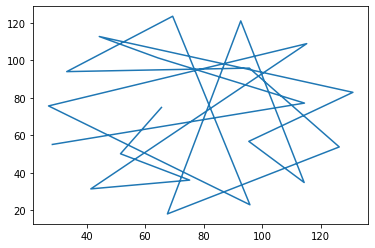

<Figure size 57600x43200 with 0 Axes>

In [13]:
sa_x_list = [];sa_y_list = []
for i in range(20):
    x = position_list[sa_permutation[i]][1]
    y = position_list[sa_permutation[i]][2]
    sa_x_list.append(x)
    sa_y_list.append(y)

plt.plot(sa_x_list,sa_y_list)
plt.figure(figsize=(800,600))
plt.show()

## ls로 구한 해의 그래프

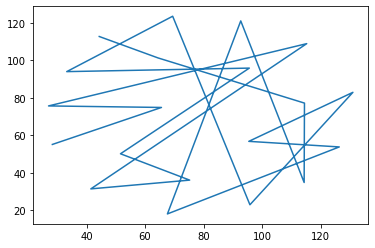

<Figure size 57600x43200 with 0 Axes>

In [14]:
ls_x_list = [];ls_y_list = []
for i in range(20):
    x = position_list[ls_permutation[i]][1]
    y = position_list[ls_permutation[i]][2]
    ls_x_list.append(x)
    ls_y_list.append(y)

plt.plot(ls_x_list,ls_y_list)
plt.figure(figsize=(800,600))
plt.show()

## dp로 구한 해의 그래프

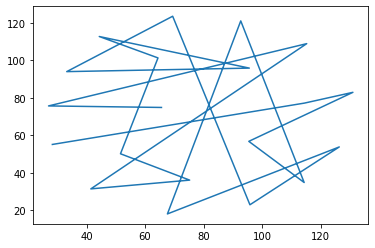

<Figure size 57600x43200 with 0 Axes>

In [15]:
dp_x_list = [];dp_y_list = []
for i in range(20):
    x = position_list[kernel[0][i]][1]
    y = position_list[kernel[0][i]][2]
    dp_x_list.append(x)
    dp_y_list.append(y)

plt.plot(dp_x_list,dp_y_list)
plt.figure(figsize=(800,600))
plt.show()